<a href="https://colab.research.google.com/github/Indian966/JBNU_BigData_Analyze/blob/master/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas==0.24.2

In [2]:
import numpy as np
import pandas as pd
pd.__version__

'0.24.2'

In [7]:
feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/UCI_HAR_Dataset/features.txt', sep = '\s+',
                              header = None, names = ['index','feature_name'], engine = 'python')
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [8]:
feature_name_df.shape

(561, 2)

In [9]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [10]:
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/UCI_HAR_Dataset/train/X_train.txt', sep='\s+', 
                      names = feature_name, engine = 'python')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/UCI_HAR_Dataset/test/X_test.txt', sep='\s+', 
                     names = feature_name, engine = 'python')
Y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/UCI_HAR_Dataset/train/y_train.txt', sep='\s+',
                      header = None,names = ['action'], engine = 'python')
Y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/UCI_HAR_Dataset/test/y_test.txt' , 
                     sep = '\s+', header = None,names = ['action'], engine = 'python')

/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [11]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [13]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986

In [14]:
print(Y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [17]:
label_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/UCI_HAR_Dataset/activity_labels.txt',
                            sep = '\s+', header = None, names = ['index', 'label'], engine = 'python')
label_name = label_name_df.iloc[:, 1].values.tolist()
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_HAR = DecisionTreeClassifier(random_state=156)
dt_HAR.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

In [19]:
Y_predict = dt_HAR.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_predict)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


In [21]:
print('결정 트리의 현재 하이퍼 매개변수: \n', dt_HAR.get_params())

결정 트리의 현재 하이퍼 매개변수: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [22]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
    }
grid_cv = GridSearchCV(dt_HAR, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score = True)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [23]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850791,0.944879
1,8,0.851069,0.982692
2,10,0.851209,0.993403
3,12,0.844135,0.997212
4,16,0.851344,0.999660
5,20,0.850800,0.999966
6,24,0.849440,1.000000


In [24]:
print('최고 평균 정확도: {0:.4f}, 최적 하이퍼 매개변수: {1}'.format(grid_cv.best_score_, grid_cv.best_params_))

최고 평균 정확도: 0.8513, 최적 하이퍼 매개변수: {'max_depth': 16}


In [25]:
params = {
    'max_depth' : [8, 16, 20],
    'min_samples_split' : [8, 16, 24]
    }
grid_cv = GridSearchCV(dt_HAR, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score = True)
grid_cv.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [26]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.852023,0.981468
1,8,16,0.854879,0.979836
2,8,24,0.851342,0.978237
3,16,8,0.844136,0.994457
4,16,16,0.847127,0.990479
5,16,24,0.849439,0.986772
6,20,8,0.846040,0.994491
7,20,16,0.848624,0.990479
8,20,24,0.849167,0.986772


In [27]:
print('최고 평균 정확도: {0:.4f}, 최적 하이퍼 매개변수: {1}'.format(grid_cv.best_score_, grid_cv.best_params_))

최고 평균 정확도: 0.8549, 최적 하이퍼 매개변수: {'max_depth': 8, 'min_samples_split': 16}


In [28]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)
print('best 결정 트리 예측 정확도: {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도: 0.8717


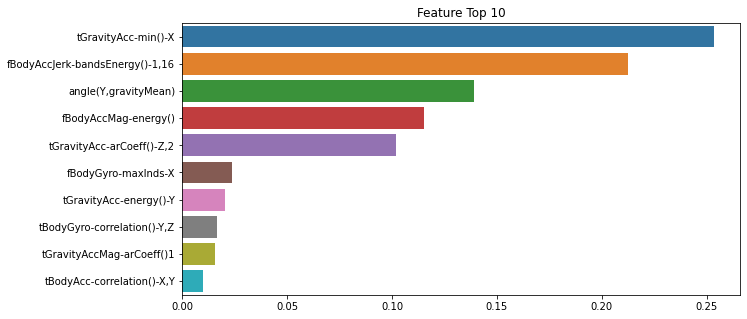

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values,index = X_train.columns)
feature_top10 = feature_importance_values_s.sort_values(ascending = False)[:10]
plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x = feature_top10, y = feature_top10.index)
plt.show()